In [ ]:
import pandas as pd
orders = pd.read_csv("data/raw/olist_orders_dataset.csv.csv", parse_dates=[
    "order_purchase_timestamp",
    "order_delivered_customer_date"
])

reviews = pd.read_csv("data/raw/olist_order_reviews_dataset.csv.csv")


In [ ]:
delivered = orders.dropna(subset=["order_delivered_customer_date"]).copy()

delivered["delivery_days"] = (
    delivered["order_delivered_customer_date"] - delivered["order_purchase_timestamp"]
).dt.days


In [ ]:

merged = pd.merge(delivered, reviews, on="order_id")


merged = merged[["order_id", "delivery_days", "review_score"]]
merged.dropna(inplace=True)
merged.head()


,order_id,delivery_days,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,8,4
1,53cdb2fc8bc7dce0b6741e2150273451,13,4
2,47770eb9100c2d0c44946d9cf07ec65d,9,5
3,949d5b44dbf5de918fe9c16f97b45f8a,13,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2,5


C:\Users\lahit\AppData\Local\Temp\ipykernel_12376\4017019491.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delivery, x="review_score", y="delivery_days", palette="mako")


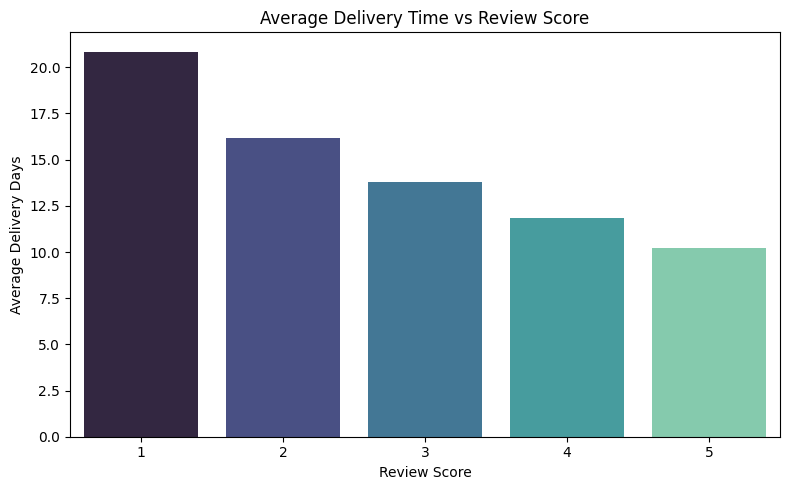

In [5]:
avg_delivery = merged.groupby("review_score")["delivery_days"].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_delivery, x="review_score", y="delivery_days", palette="mako")
plt.title("Average Delivery Time vs Review Score")
plt.ylabel("Average Delivery Days")
plt.xlabel("Review Score")
plt.tight_layout()
plt.show()


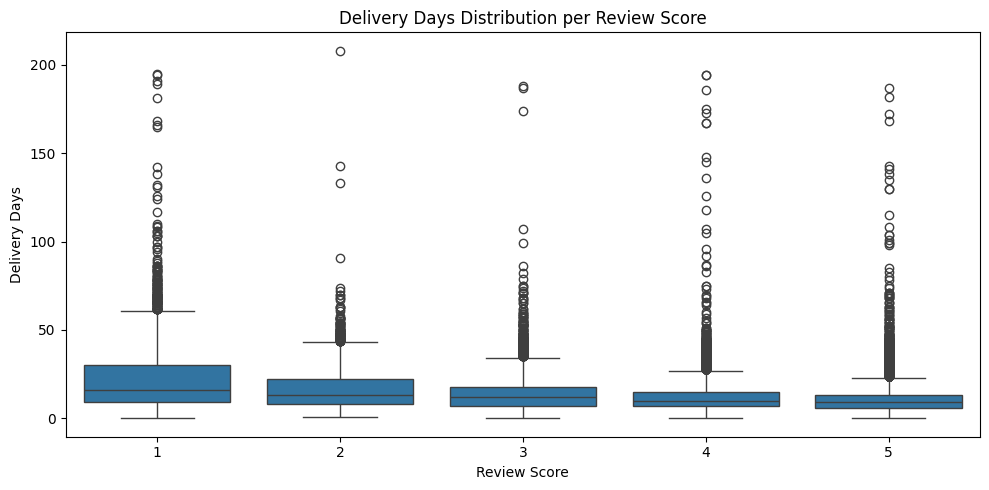

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged, x="review_score", y="delivery_days")
plt.title("Delivery Days Distribution per Review Score")
plt.ylabel("Delivery Days")
plt.xlabel("Review Score")
plt.tight_layout()
plt.show()
